# TREE - DECISION TREE WITHOUT SPECIFIC LEAF NODE

In [1216]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree

In [1217]:
train=pd.read_csv("house_train.csv")
test = pd.read_csv("HOUSE_test.csv")

In [1218]:
train.rename(columns= {"BsmtFinSF1":"BsmtFinSFOne"},inplace=True)
test.rename(columns= {"BsmtFinSF1":"BsmtFinSFOne"},inplace=True)

In [1219]:
train.GarageYrBlt.mode()

0    2005.0
dtype: float64

In [1220]:
X.columns[X.isnull().any()]

Index(['GarageYrBlt'], dtype='object')

In [1221]:
train.BsmtFinSFOne.head()

0    706
1    978
2    486
3    216
4    655
Name: BsmtFinSFOne, dtype: int64

In [1222]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
            'OverallQual','GrLivArea','PoolArea','BsmtFinSFOne','TotalBsmtSF','GarageCars','GarageYrBlt']

In [1223]:
X = train[features]
y = train.SalePrice

In [1226]:
X['GarageYrBlt']=X['GarageYrBlt'].fillna(X['GarageYrBlt'].mode()[0])

C:\Users\pdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1227]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,OverallQual,GrLivArea,PoolArea,BsmtFinSFOne,TotalBsmtSF,GarageCars,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808,6.099315,1515.463699,2.758904,443.639726,1057.429452,1.767123,1979.976027
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393,1.382997,525.480383,40.177307,456.098091,438.705324,0.747315,24.749688
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000,5.000000,1129.500000,0.000000,0.000000,795.750000,1.000000,1962.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000,6.000000,1464.000000,0.000000,383.500000,991.500000,2.000000,1984.500000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000,7.000000,1776.750000,0.000000,712.250000,1298.250000,2.000000,2003.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000,10.000000,5642.000000,738.000000,5644.000000,6110.000000,4.000000,2010.000000


In [1228]:
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state = 1)

In [1229]:
one_model = tree.DecisionTreeRegressor(random_state = 1)


In [1230]:
one_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [1231]:
val_pred = one_model.predict(test_X)

In [1232]:
df = pd.DataFrame({'Id':train.Id[:365],'NewPrice':val_pred,'OldPrice':train.SalePrice[:365]})

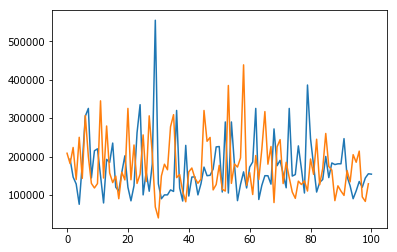

In [1233]:
%matplotlib inline
one_plot = plt.plot(df.Id[:100],df.NewPrice[:100],df.OldPrice[:100])

In [1234]:
one_error = mean_absolute_error(test_y,val_pred)
one_error

25020.712328767124

In [1235]:
def MAPE(y_test,y_predict):
    mape = np.mean(np.abs(test_y-val_pred)/test_y)*100
    print("Mean absolute percentage error is: ",round(mape,2),"%")
    return mape

In [1236]:
MAPE(test_y,val_pred)


Mean absolute percentage error is:  15.79 %


15.786069100078482

# TREE - DECISION TREE WITH SPECIFIC LEAF NODE

In [1237]:
def get_mae(max_leaf_nodes,train_X,test_X,train_y,test_y):
    model = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state = 0)
    model=model.fit(train_X,train_y)
    pred_val = model.predict(test_X)
    mae = mean_absolute_error(test_y,pred_val)
    return(mae)

In [1238]:
max_leaf_nodes = [5,50,100,250,300,500]

for i in max_leaf_nodes:
    one_error = get_mae(i,train_X,test_X,train_y,test_y)
    print("Max leaf node: %d \t \t Mean absolute error: %d" %(i,one_error))

Max leaf node: 5 	 	 Mean absolute error: 31248
Max leaf node: 50 	 	 Mean absolute error: 22560
Max leaf node: 100 	 	 Mean absolute error: 22948
Max leaf node: 250 	 	 Mean absolute error: 23755
Max leaf node: 300 	 	 Mean absolute error: 23875
Max leaf node: 500 	 	 Mean absolute error: 23936


In [1239]:
one_error = {i:get_mae(i,train_X,test_X,train_y,test_y) for i in max_leaf_nodes}

In [1240]:
best_leaf_node = min(one_error,key=one_error.get)
print("Best leaf node: ",best_leaf_node)

Best leaf node:  50


In [1241]:
two_model = tree.DecisionTreeRegressor(max_leaf_nodes = best_leaf_node,random_state = 1)
two_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [1242]:
pred_val2 = two_model.predict(test_X)

In [1243]:
df_sec = pd.DataFrame ({'Id':train.Id[:365],'New_price_one':pred_val2,'Old_price1':train.SalePrice[:365] })
df_sec.head()

,Id,New_price_one,Old_price1
0,1,193243.860465,208500
1,2,136122.741935,181500
2,3,121780.182927,223500
3,4,74117.125000,140000
4,5,163478.561404,250000


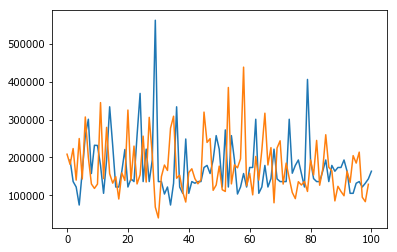

In [1244]:
two_plot = plt.plot(df_sec.Id[:100],df_sec.New_price_one[:100],df_sec.Old_price1[:100])


In [1245]:
two_error = mean_absolute_error(test_y,pred_val2)
two_error

22560.563405561457

# TREE - RANDOM FOREST

In [1246]:
forest_model = RandomForestRegressor(max_leaf_nodes = best_leaf_node,random_state =1)
forest_model.fit(train_X,train_y)
three_pred = forest_model.predict(test_X)
print("Three error:", mean_absolute_error(test_y,three_pred))

Three error: 19106.319374097773


C:\Users\pdas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# NEW TEST DATA

In [1247]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1248]:
T_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','OverallQual','GrLivArea','PoolArea','BsmtFinSFOne','TotalBsmtSF','GarageCars','GarageYrBlt']

In [1249]:
test_t_X = test[T_features]

In [1250]:
test_t_X.columns[test_t_X.isnull().any()]

Index(['BsmtFinSFOne', 'TotalBsmtSF', 'GarageCars', 'GarageYrBlt'], dtype='object')

In [1251]:
test_t_X.BsmtFinSFOne.fillna(test_t_X.BsmtFinSFOne.mean(),inplace =True)

C:\Users\pdas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [1252]:
test_t_X.TotalBsmtSF.fillna(test_t_X.TotalBsmtSF.mean(),inplace =True)

In [1261]:
test_t_X.GarageCars.fillna(test_t_X.GarageCars.min(),inplace =True)
test_t_X.GarageYrBlt.fillna(test_t_X.GarageYrBlt.mode()[0],inplace =True)

In [1262]:
T_rf_model = RandomForestRegressor(max_leaf_nodes = best_leaf_node,random_state =1)
T_rf_model = T_rf_model.fit(X,y)

C:\Users\pdas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1263]:
T_test_pred = T_rf_model.predict(test_t_X)

In [1264]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [1265]:
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': T_test_pred})
output.to_csv('submission.csv', index=False)

In [1258]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSFOne,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1259]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSFOne', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1097]:
corr = numeric_features.corr()
corr.style.background_gradient(cmap='coolwarm')